In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [105]:
data = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
chipo = pd.read_csv(url, sep = '\t')

In [106]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [107]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [108]:
chipo.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [109]:
chipo_clean = chipo.dropna()

In [110]:
chipo_clean.head(10)

,order_id,quantity,item_name,choice_description,item_price
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25


In [111]:
chipo_clean.isnull().sum()

order_id              0
quantity              0
item_name             0
choice_description    0
item_price            0
dtype: int64

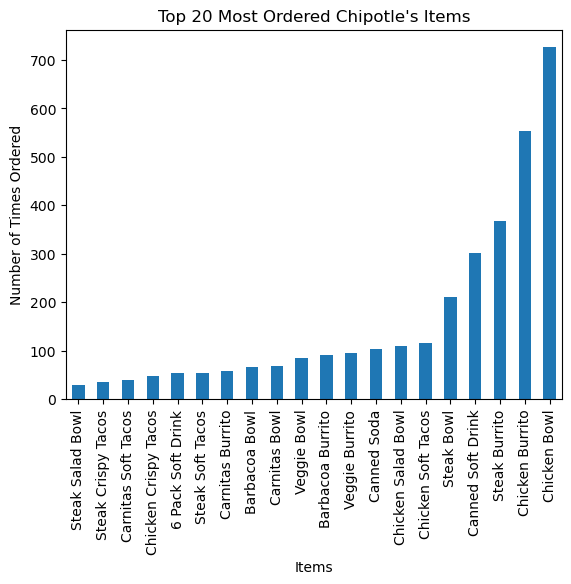

In [136]:
x = chipo_clean['item_name']

letter_counts = Counter(x)

df = pd.DataFrame.from_dict(letter_counts, orient='index', columns=['Count'])

df = df.sort_values(by='Count', ascending=True)

df_top_items = df.tail(20)

df_top_items.plot(kind='bar', legend=False)
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title("Top 20 Most Ordered Chipotle's Items")

plt.show()

/var/folders/l_/lg28krq92435nfyq7l1zjtw40000gn/T/ipykernel_45303/816309259.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo_clean['item_price'] = pd.to_numeric(chipo_clean['item_price'].str.replace('$', ''), errors='coerce')


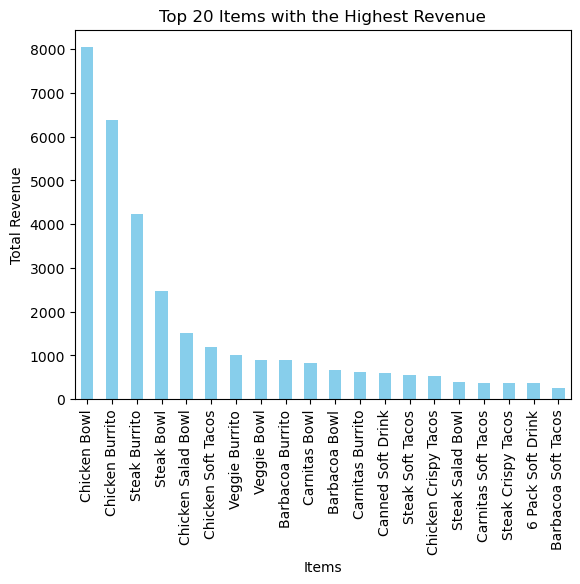

In [137]:
chipo_clean['item_price'] = chipo_clean['item_price'].astype(str)
chipo_clean['item_price'] = pd.to_numeric(chipo_clean['item_price'].str.replace('$', ''), errors='coerce')


chipo_clean['revenue'] = chipo_clean['quantity'] * chipo_clean['item_price']

revenue_per_item = chipo_clean.groupby('item_name')['revenue'].sum()

df_revenue_per_item = revenue_per_item.reset_index(name='Total Revenue')

df_revenue_per_item = df_revenue_per_item.sort_values(by='Total Revenue', ascending=False)

df_top_revenue_items = df_revenue_per_item.head(20)

df_top_revenue_items.plot(kind='bar', x='item_name', y='Total Revenue', legend=False, color='skyblue')
plt.xlabel('Items')
plt.ylabel('Total Revenue')
plt.title("Top 20 Items with the Highest Revenue")
pd.options.mode.chained_assignment = None

plt.show()

Mean Squared Error: 5.51
R-squared: 0.91


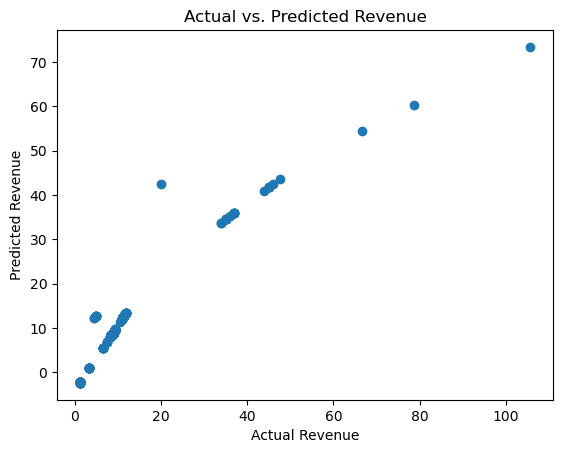

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


features = ['item_price', 'quantity'] 

X = chipot_clean[features]
y = chipotle_clean['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')
plt.show()

In [ ]:
# the conclusion:
1- The MSE is considered as low while SR consdeired as high which means the model works well for/
predicting the revenue.
2- Some items prices not matching the revenue as the revenue is not on the same level of sales (for/
example: canned soft drink is the 4th highest sales while in the revnue analysis we can see it in the/
16th level,same goes for canned soda while it is the 8th highest sales while is not found in the highest/
revenue):
    - This issue could be resolved either by revisiting the item price or having deals with soft drinks/
comapnies to get price lower than the market so the revenue can be higher.
3- Overall increasing the revenue:
    - Creating new items: such as personal customized plates, tacos and bowl which the consumer can/
    select the ingredients, toppings and deatils. And this will give the consumer feeling that this/
    order is particular for them (kind of emotionally marketing).Then analysis can be done to check/
    the most requested to put them on the menu.
    - As chips is one of the most known items in chiplote but not found in the 20 most sold items so/
    new flavours can be created with most sold items such as chicken bowl, chicken burrito and/
    steak burrito. Also as marketing a survey can be done before doing this change so the consumer/
    can feel included in such changes .